## Importing Necessary Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import utils
from sklearn.feature_selection import mutual_info_classif
import plotly.graph_objs as go
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder

## Load Datasets
-credit_score_cleaned_train.csv

-train.csv

In [2]:
# Load datasets
train_ds = pd.read_csv('./resources/train.csv')
clean_ds = pd.read_csv('./resources/credit_score_cleaned_train.csv')

C:\Users\hdomi\AppData\Local\Temp\ipykernel_1248\3337449085.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_ds = pd.read_csv('./resources/train.csv')


## EDA and Data Cleanup

In [3]:
# Exploratory data analysis and basic cleaning
print("Train Dataset Credit Score Counts:\n", train_ds['Credit_Score'].value_counts())
print("Clean Dataset Overview:")
print(clean_ds.info())
print("Credit Score Value Counts:\n", clean_ds['credit_score'].value_counts())

Train Dataset Credit Score Counts:
 Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Clean Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_

In [4]:
clean_ds

id customer_id     month           name  age          ssn  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265   
...        ...         ...       ...            ...  ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25  078-73-5990   

      occupation  annual_income  monthly_inhand_salary  total_emi_per_month  \
0      Scientist       19114.12              1824.8434            49.574947   
1      Scientist       19114.12              1824.8434            49.574947   
2      Scientist       19114.12              1824.8434            49.574947   
3      Scientist       19114.12              1824.8434            49.574947   
4      Scientist       19114.12              1824.8434            49.574947   
...          ...            ...                    ...                  ...   
99995   Mechanic       39628.99              3359.4158            35.104023   
99996   Mechanic       39628.99              3359.4158            35.104023   
99997   Mechanic       39628.99              3359.4158            35.104023   
99998   Mechanic       39628.99              3359.4158            35.104023   
99999   Mechanic       39628.99              3359.4158            35.104023   

       ...  num_credit_inquiries  credit_mix  outstanding_debt  \
0      ...                     4        Good            809.98   
1      ...                     4        Good            809.98   
2      ...                     4        Good            809.98   
3      ...                     4        Good            809.98   
4      ...                     4        Good            809.98   
...    ...                   ...         ...               ...   
99995  ...                     3        Good            502.38   
99996  ...                     3        Good            502.38   
99997  ...                     3        Good            502.38   
99998  ...                     3        Good            502.38   
99999  ...                     3        Good            502.38   

       credit_utilization_ratio credit_history_age  payment_of_min_amount  \
0                     26.822620                265                     No   
1                     31.944960                266                     No   
2                     28.609352                267                     No   
3                     31.377861                268                     No   
4                     24.797346                269                     No   
...                         ...                ...                    ...   
99995                 34.663570                378                     No   
99996                 40.565630                379                     No   
99997                 41.255524                380                     No   
99998                 33.638206                381                     No   
99999                 34.192463                382                     No   

       amount_invested_monthly                 payment_behaviour  \
0                    80.415300   High_spent_Small_value_payments   
1                   118.280220    Low_spent_Large_value_payments   
2                    81.699524   Low_spent_Medium_value_payments   
3                   199.458070    Low_spent_Small_value_payments   
4                    41.420155  High_spent_Medium_value_payments   
...                        ...                              

In [5]:
clean_ds['credit_score'].value_counts()

credit_score
1    53174
0    28998
2    17828
Name: count, dtype: int64

In [6]:
clean_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [7]:
clean_ds

id customer_id     month           name  age          ssn  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265   
...        ...         ...       ...            ...  ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25  078-73-5990   

      occupation  annual_income  monthly_inhand_salary  total_emi_per_month  \
0      Scientist       19114.12              1824.8434            49.574947   
1      Scientist       19114.12              1824.8434            49.574947   
2      Scientist       19114.12              1824.8434            49.574947   
3      Scientist       19114.12              1824.8434            49.574947   
4      Scientist       19114.12              1824.8434            49.574947   
...          ...            ...                    ...                  ...   
99995   Mechanic       39628.99              3359.4158            35.104023   
99996   Mechanic       39628.99              3359.4158            35.104023   
99997   Mechanic       39628.99              3359.4158            35.104023   
99998   Mechanic       39628.99              3359.4158            35.104023   
99999   Mechanic       39628.99              3359.4158            35.104023   

       ...  num_credit_inquiries  credit_mix  outstanding_debt  \
0      ...                     4        Good            809.98   
1      ...                     4        Good            809.98   
2      ...                     4        Good            809.98   
3      ...                     4        Good            809.98   
4      ...                     4        Good            809.98   
...    ...                   ...         ...               ...   
99995  ...                     3        Good            502.38   
99996  ...                     3        Good            502.38   
99997  ...                     3        Good            502.38   
99998  ...                     3        Good            502.38   
99999  ...                     3        Good            502.38   

       credit_utilization_ratio credit_history_age  payment_of_min_amount  \
0                     26.822620                265                     No   
1                     31.944960                266                     No   
2                     28.609352                267                     No   
3                     31.377861                268                     No   
4                     24.797346                269                     No   
...                         ...                ...                    ...   
99995                 34.663570                378                     No   
99996                 40.565630                379                     No   
99997                 41.255524                380                     No   
99998                 33.638206                381                     No   
99999                 34.192463                382                     No   

       amount_invested_monthly                 payment_behaviour  \
0                    80.415300   High_spent_Small_value_payments   
1                   118.280220    Low_spent_Large_value_payments   
2                    81.699524   Low_spent_Medium_value_payments   
3                   199.458070    Low_spent_Small_value_payments   
4                    41.420155  High_spent_Medium_value_payments   
...                        ...                              

## Removing unnecessary columns before Encoding

In [ ]:
ssn_column = clean_ds['ssn'].copy()

In [8]:
# Drop unnecessary columns
clean_ds = clean_ds.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

In [9]:
clean_ds

month  age occupation  annual_income  monthly_inhand_salary  \
0       January   23  Scientist       19114.12              1824.8434   
1      February   23  Scientist       19114.12              1824.8434   
2         March   23  Scientist       19114.12              1824.8434   
3         April   23  Scientist       19114.12              1824.8434   
4           May   23  Scientist       19114.12              1824.8434   
...         ...  ...        ...            ...                    ...   
99995     April   25   Mechanic       39628.99              3359.4158   
99996       May   25   Mechanic       39628.99              3359.4158   
99997      June   25   Mechanic       39628.99              3359.4158   
99998      July   25   Mechanic       39628.99              3359.4158   
99999    August   25   Mechanic       39628.99              3359.4158   

       total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0                49.574947                  3                4              3   
1                49.574947                  3                4              3   
2                49.574947                  3                4              3   
3                49.574947                  3                4              3   
4                49.574947                  3                4              3   
...                    ...                ...              ...            ...   
99995            35.104023                  4                6              7   
99996            35.104023                  4                6              7   
99997            35.104023                  4                6              7   
99998            35.104023                  4                6              7   
99999            35.104023                  4                6              7   

       num_of_loan  ...  num_credit_inquiries  credit_mix  outstanding_debt  \
0                4  ...                     4        Good            809.98   
1                4  ...                     4        Good            809.98   
2                4  ...                     4        Good            809.98   
3                4  ...                     4        Good            809.98   
4                4  ...                     4        Good            809.98   
...            ...  ...                   ...         ...               ...   
99995            2  ...                     3        Good            502.38   
99996            2  ...                     3        Good            502.38   
99997            2  ...                     3        Good            502.38   
99998            2  ...                     3        Good            502.38   
99999            2  ...                     3        Good            502.38   

       credit_utilization_ratio credit_history_age  payment_of_min_amount  \
0                     26.822620                265                     No   
1                     31.944960                266                     No   
2                     28.609352                267                     No   
3                     31.377861                268                     No   
4                     24.797346                269                     No   
...                         ...                ...                    ...   
99995                 34.663570                378                     No   
99996                 40.565630                379                     No   
99997                 41.255524                380                     No   
99998                 33.638206                381                     No   
99999                 34.192463                382                     No   

       amount_invested_monthly                 payment_behaviour  \
0                    80.415300   High_spent_Small_value_payments   
1                   118.280220    Low_spent_Large_value_payments   
2                    81.699524   Low_spent_Medium_value_payments   
3             

In [10]:
# Map month names to numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map and handle NaNs by filling with a default value (e.g., 0) if needed
clean_ds['month'] = clean_ds['month'].map(month_mapping).fillna(0).astype(int)


In [11]:
clean_ds

month  age occupation  annual_income  monthly_inhand_salary  \
0          1   23  Scientist       19114.12              1824.8434   
1          2   23  Scientist       19114.12              1824.8434   
2          3   23  Scientist       19114.12              1824.8434   
3          4   23  Scientist       19114.12              1824.8434   
4          5   23  Scientist       19114.12              1824.8434   
...      ...  ...        ...            ...                    ...   
99995      4   25   Mechanic       39628.99              3359.4158   
99996      5   25   Mechanic       39628.99              3359.4158   
99997      6   25   Mechanic       39628.99              3359.4158   
99998      7   25   Mechanic       39628.99              3359.4158   
99999      8   25   Mechanic       39628.99              3359.4158   

       total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0                49.574947                  3                4              3   
1                49.574947                  3                4              3   
2                49.574947                  3                4              3   
3                49.574947                  3                4              3   
4                49.574947                  3                4              3   
...                    ...                ...              ...            ...   
99995            35.104023                  4                6              7   
99996            35.104023                  4                6              7   
99997            35.104023                  4                6              7   
99998            35.104023                  4                6              7   
99999            35.104023                  4                6              7   

       num_of_loan  ...  num_credit_inquiries  credit_mix  outstanding_debt  \
0                4  ...                     4        Good            809.98   
1                4  ...                     4        Good            809.98   
2                4  ...                     4        Good            809.98   
3                4  ...                     4        Good            809.98   
4                4  ...                     4        Good            809.98   
...            ...  ...                   ...         ...               ...   
99995            2  ...                     3        Good            502.38   
99996            2  ...                     3        Good            502.38   
99997            2  ...                     3        Good            502.38   
99998            2  ...                     3        Good            502.38   
99999            2  ...                     3        Good            502.38   

       credit_utilization_ratio credit_history_age  payment_of_min_amount  \
0                     26.822620                265                     No   
1                     31.944960                266                     No   
2                     28.609352                267                     No   
3                     31.377861                268                     No   
4                     24.797346                269                     No   
...                         ...                ...                    ...   
99995                 34.663570                378                     No   
99996                 40.565630                379                     No   
99997                 41.255524                380                     No   
99998                 33.638206                381                     No   
99999                 34.192463                382                     No   

       amount_invested_monthly                 payment_behaviour  \
0                    80.415300   High_spent_Small_value_payments   
1                   118.280220    Low_spent_Large_value_payments   
2                    81.699524   Low_spent_Medium_value_payments   
3                   199.458070    Low_spent_Sma

## Encoding the Data

In [12]:
# Encode the target variable
label_encoder = LabelEncoder()
clean_ds['credit_score'] = label_encoder.fit_transform(clean_ds['credit_score'])

In [14]:
# One-Hot Encode 'Occupation' and Label Encode Other Categorical Features
# One-Hot Encode 'Occupation' and Label Encode Other Categorical Features
categorical_features = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# One-Hot Encoding 'Occupation' column
# occupation_encoded = onehot_encoder.fit_transform(clean_ds[['occupation']])
# occupation_df = pd.DataFrame(occupation_encoded, columns=onehot_encoder.get_feature_names_out(['occupation']))

# Label encode the other categorical features
clean_ds[categorical_features[0:]] = clean_ds[categorical_features[0:]].apply(lambda col: col.astype('category').cat.codes)

# Drop the original 'occupation' column and concatenate the one-hot encoded columns
# clean_ds = pd.concat([clean_ds.drop(columns=['occupation']), occupation_df], axis=1)

# Check the result

print(clean_ds.head())

   month  age  occupation  annual_income  monthly_inhand_salary  \
0      1   23          12       19114.12              1824.8434   
1      2   23          12       19114.12              1824.8434   
2      3   23          12       19114.12              1824.8434   
3      4   23          12       19114.12              1824.8434   
4      5   23          12       19114.12              1824.8434   

   total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0            49.574947                  3                4              3   
1            49.574947                  3                4              3   
2            49.574947                  3                4              3   
3            49.574947                  3                4              3   
4            49.574947                  3                4              3   

   num_of_loan  ...  num_credit_inquiries  credit_mix  outstanding_debt  \
0            4  ...                     4           1      

In [15]:
# Separate features and target variable
X = clean_ds.drop('credit_score', axis=1)
y = clean_ds['credit_score']

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Random Forest Classifier Setup

In [19]:
# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=78, n_estimators=128)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=128, random_state=78)

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before:", Counter(y))
print("After:", Counter(y_resampled))

Before: Counter({1: 53174, 0: 28998, 2: 17828})
After: Counter({2: 53174, 1: 53174, 0: 53174})


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=78)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=78, n_estimators=128)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=78)

In [22]:
# Evaluate the model
y_pred = clf.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.91181264261177
Precision Score: 0.9140113525229939
Recall Score: 0.91181264261177
F1 Score: 0.9097798830665907

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     13344
           1       0.94      0.79      0.86     13310
           2       0.92      0.99      0.95     13227

    accuracy                           0.91     39881
   macro avg       0.91      0.91      0.91     39881
weighted avg       0.91      0.91      0.91     39881



## Features Importance Analysis

In [23]:
# Feature Importance Analysis
feature_importances = clf.feature_importances_
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)

In [24]:
# Display top 10 most important features
print("Top 10 Important Features:")
for importance, feature in importances_sorted[:10]:
    print(f"{feature}: {importance:.4f}")


Top 10 Important Features:
outstanding_debt: 0.1065
interest_rate: 0.0870
credit_mix: 0.0688
credit_history_age: 0.0614
payment_of_min_amount: 0.0587
delay_from_due_date: 0.0584
changed_credit_limit: 0.0477
num_credit_inquiries: 0.0464
total_emi_per_month: 0.0422
annual_income: 0.0392


C:\Users\hdomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


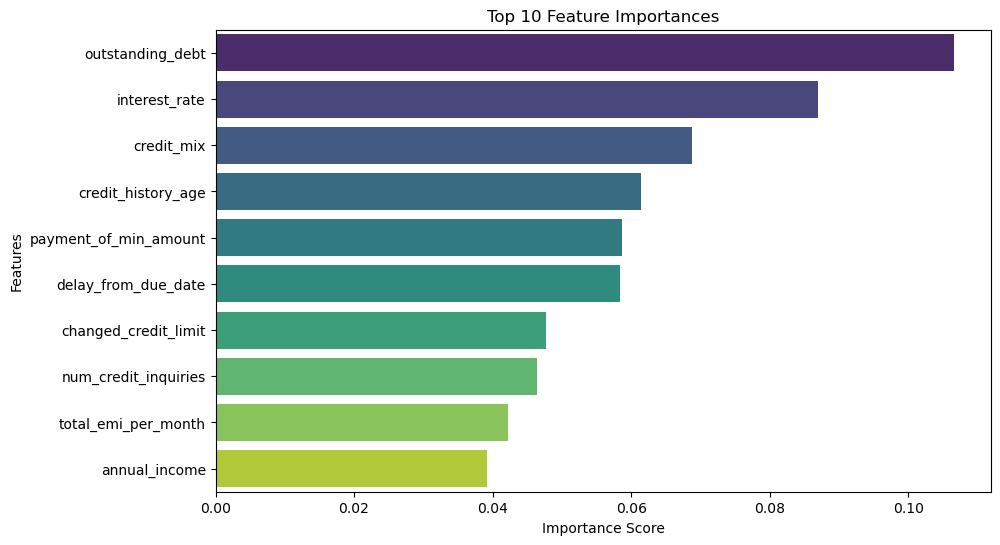

In [25]:
top_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)[:10]
feature_names = [f[0] for f in top_features]
importances = [f[1] for f in top_features]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig('top10_feat.png')
plt.show()



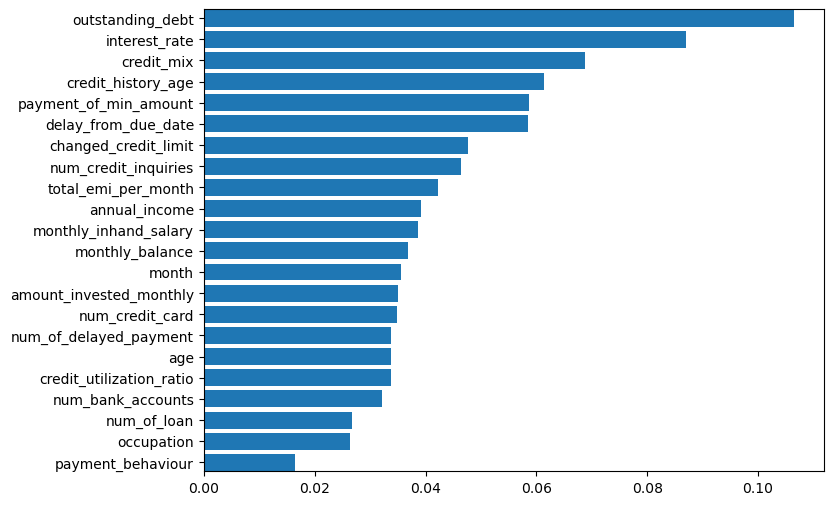

In [26]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

## Decision Tree Setup

In [27]:
clean_ds[['outstanding_debt', 'credit_score']]
# clean_ds[['outstanding_debt', 'interest_rate', 'credit_mix', 'credit_history_age', 'delay_from_due_date', 'credit_score', 'monthly_balance']]

outstanding_debt  credit_score
0                809.98             2
1                809.98             2
2                809.98             2
3                809.98             2
4                809.98             2
...                 ...           ...
99995            502.38             0
99996            502.38             0
99997            502.38             0
99998            502.38             1
99999            502.38             0

[100000 rows x 2 columns]

In [28]:
clean_ds['credit_mix'].value_counts()

credit_mix
2    45848
1    30384
0    23768
Name: count, dtype: int64

In [29]:

# Decision Tree Model Initializztion and Fit
dt_clf = DecisionTreeClassifier(random_state=78, max_depth=10)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=78)

In [30]:
# Predict the Decision Tree model and Print Scores
y_pred_dt = dt_clf.predict(X_test_scaled)
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision Score:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Recall Score:", recall_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy Score: 0.7492791053383817
Decision Tree Precision Score: 0.74869360490069
Decision Tree Recall Score: 0.7492791053383817
Decision Tree F1 Score: 0.7444234003989691

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78     13344
           1       0.74      0.59      0.65     13310
           2       0.74      0.87      0.80     13227

    accuracy                           0.75     39881
   macro avg       0.75      0.75      0.74     39881
weighted avg       0.75      0.75      0.74     39881



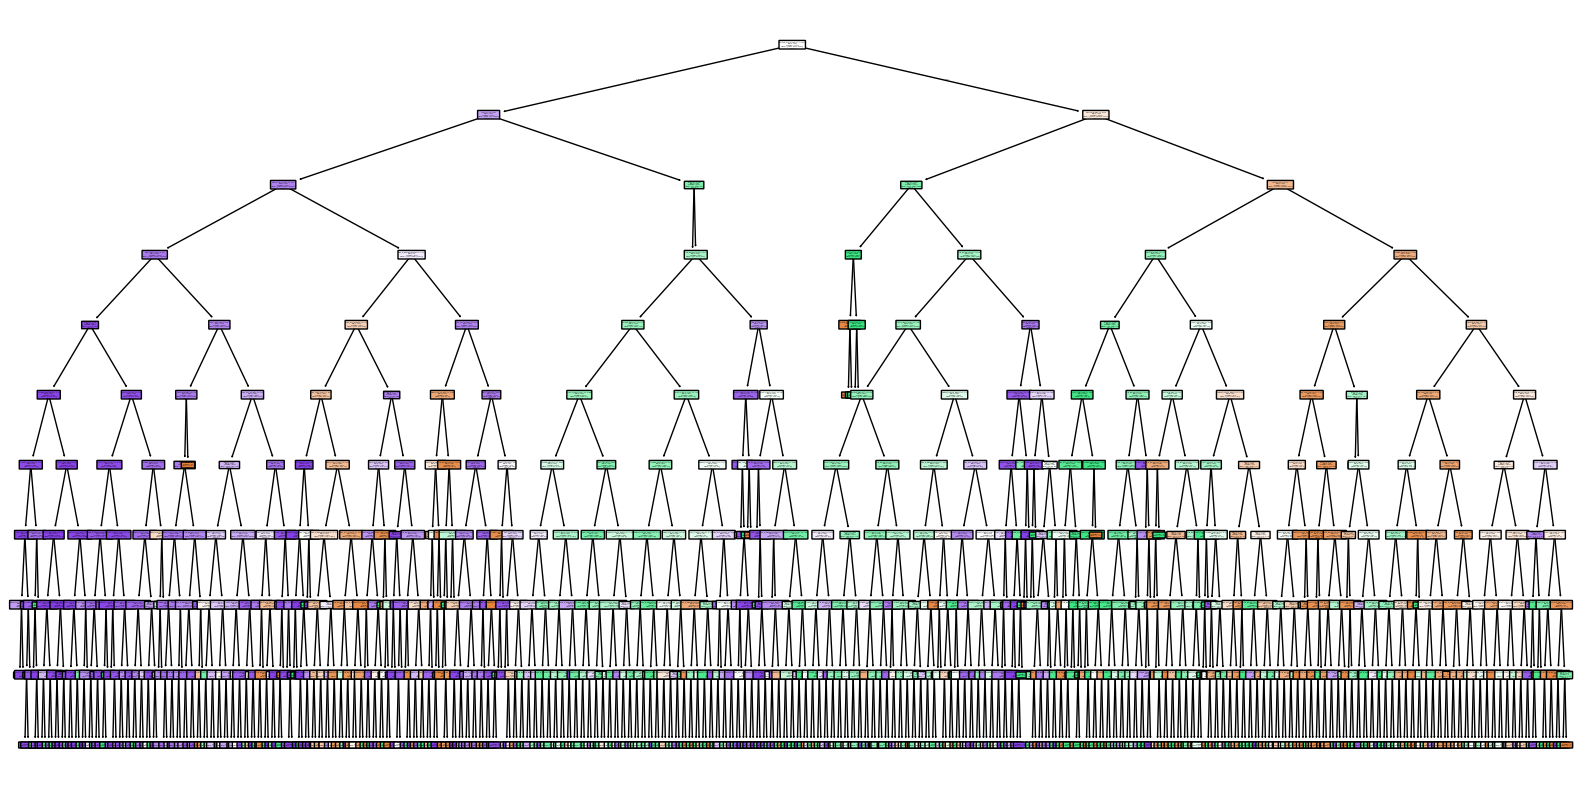

In [31]:
# Plot Decision Tree Features
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=[str(cls) for cls in label_encoder.classes_], filled=True, rounded=True)
plt.savefig('x.png', dpi=300, bbox_inches='tight')
plt.show()

## Comparing Random Forest and Desicion Tree Models

In [32]:
# Model Comparison
# compare the Decision Tree and Random Forest models, print the scores side-by-side:
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [accuracy_score(y_test, y_pred), 
                      precision_score(y_test, y_pred, average='weighted'), 
                      recall_score(y_test, y_pred, average='weighted'), 
                      f1_score(y_test, y_pred, average='weighted')],
    'Decision Tree': [accuracy_score(y_test, y_pred_dt), 
                      precision_score(y_test, y_pred_dt, average='weighted'), 
                      recall_score(y_test, y_pred_dt, average='weighted'), 
                      f1_score(y_test, y_pred_dt, average='weighted')]
})
print(metrics)

      Metric  Random Forest  Decision Tree
0   Accuracy       0.911813       0.749279
1  Precision       0.914011       0.748694
2     Recall       0.911813       0.749279
3   F1 Score       0.909780       0.744423


## SVM Setup

In [33]:
# Initialize the SVM model with a linear kernel
svm_clf = LinearSVC(random_state=78)

In [34]:
# Train Fit the model 
svm_clf.fit(X_train_scaled, y_train)

LinearSVC(random_state=78)

In [35]:
# Make predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

In [36]:
# Print evaluation metrics
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision Score:", precision_score(y_test, y_pred_svm, average='weighted'))
print("SVM Recall Score:", recall_score(y_test, y_pred_svm, average='weighted'))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy Score: 0.6932373812090971
SVM Precision Score: 0.6937074773416734
SVM Recall Score: 0.6932373812090971
SVM F1 Score: 0.6886809831495464

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70     13344
           1       0.66      0.57      0.61     13310
           2       0.69      0.85      0.76     13227

    accuracy                           0.69     39881
   macro avg       0.69      0.69      0.69     39881
weighted avg       0.69      0.69      0.69     39881



In [37]:
# Create a comparison DataFrame for model evaluation metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ],
    'Decision Tree': [
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted')
    ],
    'SVM': [
        accuracy_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted')
    ]
})

# Display the comparison table
print(metrics)


      Metric  Random Forest  Decision Tree       SVM
0   Accuracy       0.911813       0.749279  0.693237
1  Precision       0.914011       0.748694  0.693707
2     Recall       0.911813       0.749279  0.693237
3   F1 Score       0.909780       0.744423  0.688681


In [38]:
display(y_test)



27285     2
100325    0
93863     1
109574    0
21450     1
         ..
37255     0
105951    0
22886     1
145278    2
110174    0
Name: credit_score, Length: 39881, dtype: int64

In [39]:
# Generate confusion matrices for each model
label=[0, 1, 2]
cm_rf = confusion_matrix(y_test, y_pred, labels=label)         # Random Forest
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=label)      # Decision Tree
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=label)    # SVM

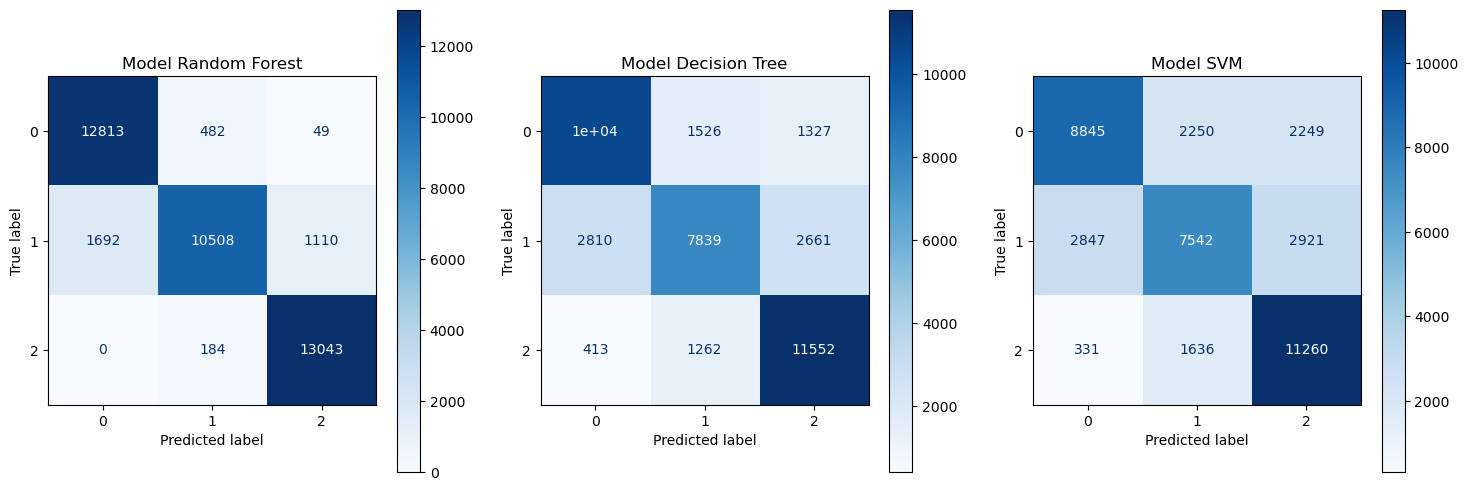

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
matrixes = [cm_rf, cm_dt, cm_svm]

for i, cm in enumerate(matrixes):
    # Create confusion matrix display for each matrix in the list
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(ax=axes[i], cmap="Blues")
    axes[i].set_title(f"Model {['Random Forest', 'Decision Tree', 'SVM'][i]}")

plt.show()

In [41]:
# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

Text(195.72222222222223, 0.5, 'Actual')

In [42]:
# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

Text(688.0751633986929, 0.5, 'Actual')

In [43]:
# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

Text(1180.4281045751634, 0.5, 'Actual')

Text(45.722222222222214, 0.5, 'Actual')

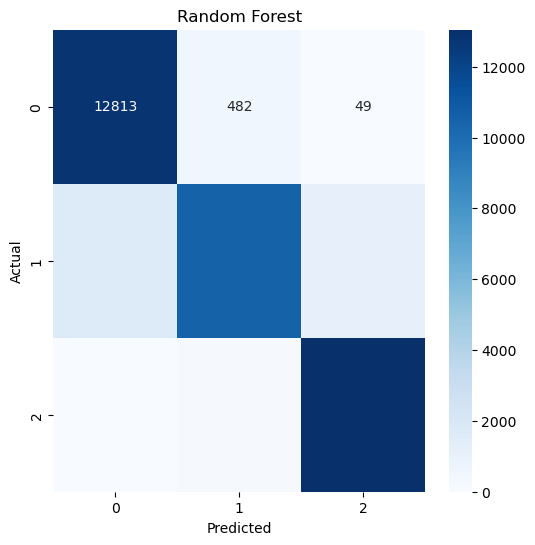

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            ax=axes)

axes.set_title("Random Forest")
axes.set_xlabel("Predicted")
axes.set_ylabel("Actual")

## Initial Visualization of Categories

In [50]:
clean_ds

month  age  occupation  annual_income  monthly_inhand_salary  \
0          1   23          12       19114.12              1824.8434   
1          2   23          12       19114.12              1824.8434   
2          3   23          12       19114.12              1824.8434   
3          4   23          12       19114.12              1824.8434   
4          5   23          12       19114.12              1824.8434   
...      ...  ...         ...            ...                    ...   
99995      4   25           9       39628.99              3359.4158   
99996      5   25           9       39628.99              3359.4158   
99997      6   25           9       39628.99              3359.4158   
99998      7   25           9       39628.99              3359.4158   
99999      8   25           9       39628.99              3359.4158   

       total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0                49.574947                  3                4              3   
1                49.574947                  3                4              3   
2                49.574947                  3                4              3   
3                49.574947                  3                4              3   
4                49.574947                  3                4              3   
...                    ...                ...              ...            ...   
99995            35.104023                  4                6              7   
99996            35.104023                  4                6              7   
99997            35.104023                  4                6              7   
99998            35.104023                  4                6              7   
99999            35.104023                  4                6              7   

       num_of_loan  ...  num_credit_inquiries  credit_mix  outstanding_debt  \
0                4  ...                     4           1            809.98   
1                4  ...                     4           1            809.98   
2                4  ...                     4           1            809.98   
3                4  ...                     4           1            809.98   
4                4  ...                     4           1            809.98   
...            ...  ...                   ...         ...               ...   
99995            2  ...                     3           1            502.38   
99996            2  ...                     3           1            502.38   
99997            2  ...                     3           1            502.38   
99998            2  ...                     3           1            502.38   
99999            2  ...                     3           1            502.38   

       credit_utilization_ratio  credit_history_age  payment_of_min_amount  \
0                     26.822620                 265                      0   
1                     31.944960                 266                      0   
2                     28.609352                 267                      0   
3                     31.377861                 268                      0   
4                     24.797346                 269                      0   
...                         ...                 ...                    ...   
99995                 34.663570                 378                      0   
99996                 40.565630                 379                      0   
99997                 41.255524                 380                      0   
99998                 33.638206                 381                      0   
99999                 34.192463                 382                      0   

       amount_invested_monthly  payment_behaviour  monthly_balance  \
0                    80.415300                  2        312.49408   
1                   118.280220                  3        284.62915   
2                    81.699524                  4        331.20987   
3              

### Credit Score by Ocupation Cleanup

In [ ]:
clean_ds['ssn'] = ssn_column

In [51]:
# Mapping Credit Scores Numeric to Categorical Values
def map_credit_score(score):
    if score == 2:
        return "Good"
    elif score == 1:
        return "Standard"
    else:
        return "Poor"

# Apply the mapping to the 'credit_score' column.
clean_ds['credit_score_category'] = clean_ds['credit_score'].astype(int).apply(map_credit_score)

In [ ]:
#  Ensure that 'credit_score' is treated as a categorical variable
clean_ds['credit_score'] = clean_ds['credit_score'].astype(str)

mode_occupation = clean_ds.groupby('ssn')['occupation'].transform(lambda x: x.mode()[0] 
                                                                  if not x.mode().empty 
                                                                  else np.nan)
# Get the global mode of 'occupation' column to fill any remaining NaNs.
mode_global = clean_ds["occupation"].mode()[0]

# Fill missing values in 'occupation' with the calculated mode per 'ssn' or the global mode.
clean_ds['occupation'] = clean_ds['occupation'].fillna(mode_occupation).fillna(mode_global)

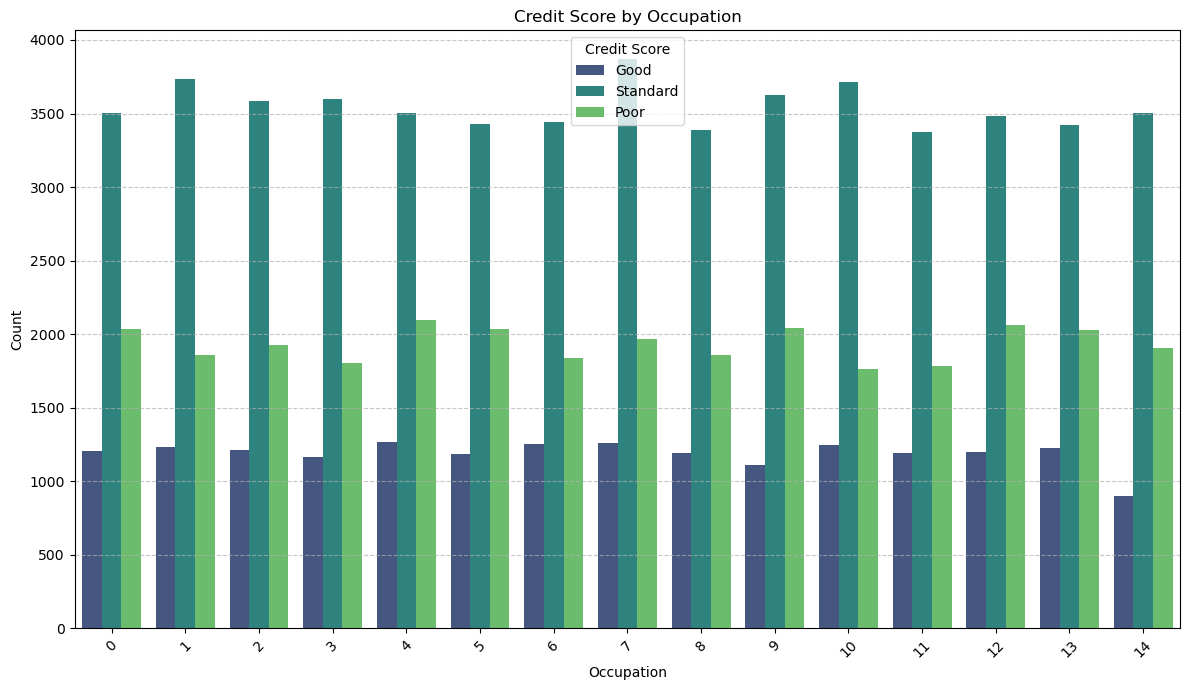

In [53]:
#  Plotting Credit Score by Occupation
plt.figure(figsize=(12, 7))
sns.countplot(x='occupation', hue='credit_score_category', data=clean_ds, palette="viridis")
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Credit Score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only show horizontal gridlines for clarity
plt.tight_layout()
plt.savefig('./Graphs/CreditScoreByOccupation.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
clean_ds.payment_of_min_amount.value_counts()

payment_of_min_amount
1    59432
0    40568
Name: count, dtype: int64

In [55]:
clean_ds['payment_of_min_amount'].isna().sum()

0

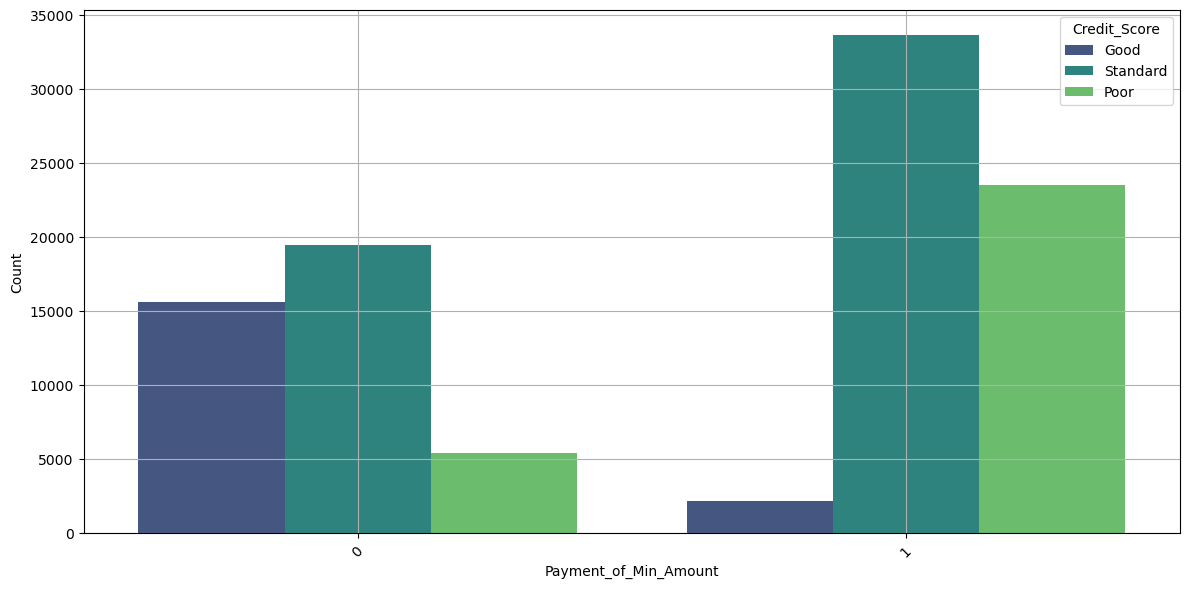

In [56]:
#  Plotting Payment_of_Min_Amount in relation to Credit Score
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_of_min_amount', hue='credit_score_category', data=clean_ds, 
              palette="viridis")
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('./Graphs/CreditScoreByPaymentOfMinAmount.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
clean_ds.payment_behaviour.value_counts()

payment_behaviour
5    27588
1    19015
4    15012
0    14839
2    12244
3    11302
Name: count, dtype: int64

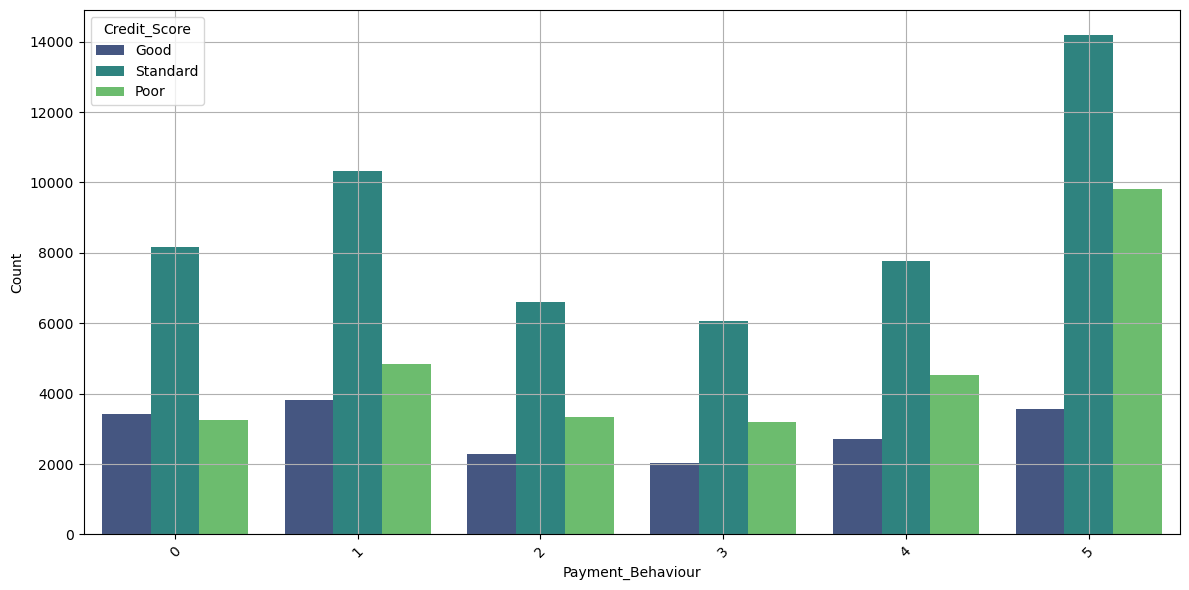

In [58]:
#  Plotting Payment_Behaviour in relation to Credit Score
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_behaviour', hue='credit_score_category', data=clean_ds, 
              palette="viridis")
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('./Graphs/CreditScoreByPaymentBehaviour.png', dpi=300, bbox_inches='tight')
plt.show()

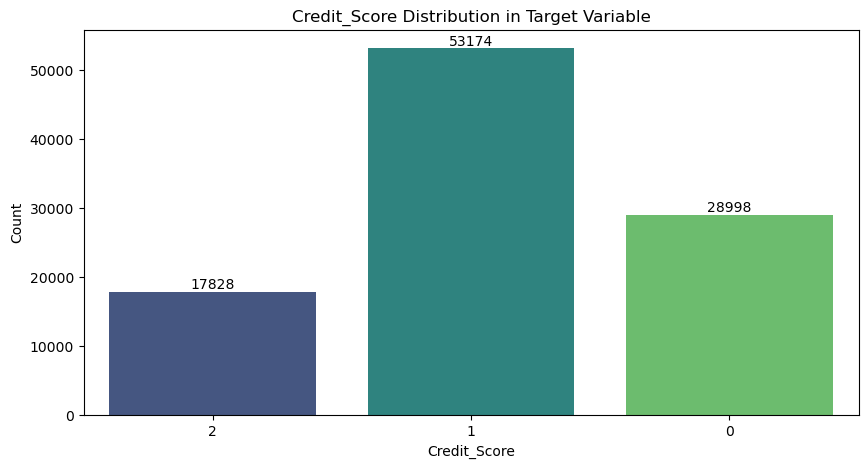

In [59]:
# Distribution of target variable(Credit_score)

plt.figure(figsize=(10, 5))
ax=sns.countplot(data=clean_ds, x='credit_score', palette="viridis")
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Target Variable')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.savefig('./Graphs/CreditScoreDistTargetVariable.png', dpi=300, bbox_inches='tight')
plt.show()

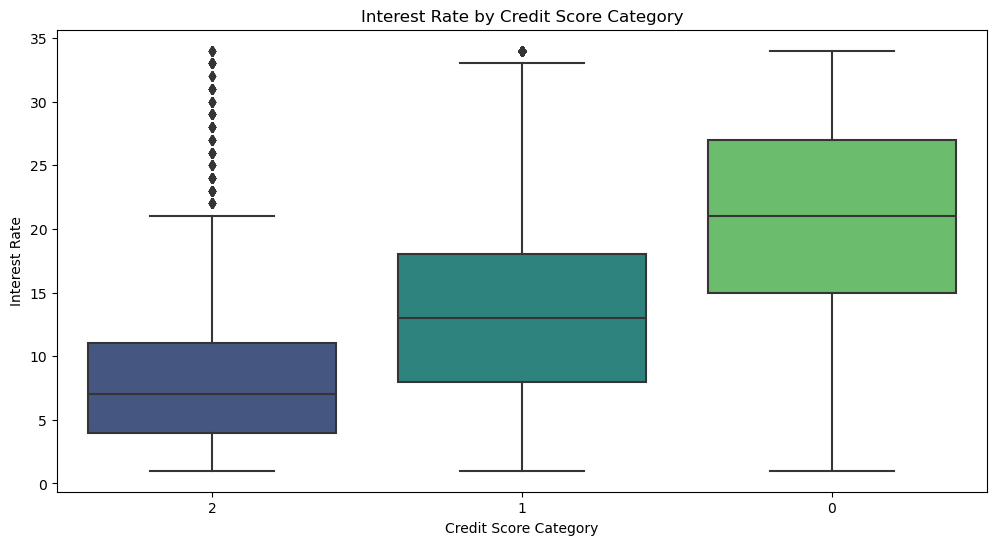

In [62]:
# Plot Interest Rate Distribution by Credit Score Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_ds, x='credit_score', y='interest_rate', palette="viridis")
plt.title("Interest Rate by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Interest Rate")
plt.savefig('./Graphs/InterestByCreditScore.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\hdomi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


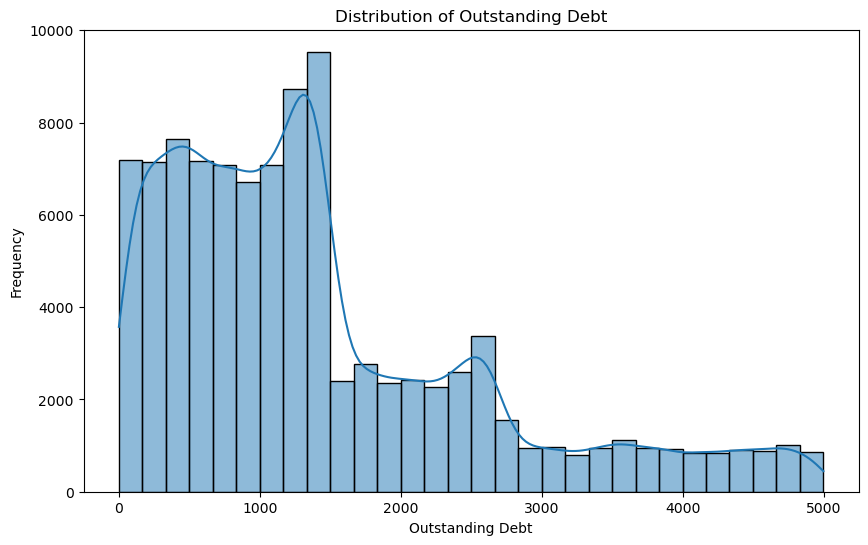

In [63]:
# Plot Outstanding Debt Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_ds, x='outstanding_debt', bins=30, kde=True)
plt.title("Distribution of Outstanding Debt")
plt.xlabel("Outstanding Debt")
plt.ylabel("Frequency")
plt.savefig('./Graphs/OutstandingDebtDist.png', dpi=300, bbox_inches='tight')
plt.show()


Calculating Mutual Information Scores for Categorical Features to determine which Categories are best to used in predicting

In [65]:
# Encode categorical columns using OrdinalEncoder
categorical_columns = clean_ds.select_dtypes(include=['object']).columns
data_encoded = clean_ds.copy()
encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])


In [66]:
# Encode the target column
data_encoded['Credit_Score_Encoded'] = encoder.fit_transform(data_encoded[['credit_score']])

In [67]:
# Define target and features
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

In [68]:
# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

In [69]:
# Display scores by feature
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'month': Mutual Information Score = 0.0046554158879827945
Feature 'age': Mutual Information Score = 0.02428158860673335
Feature 'occupation': Mutual Information Score = 0.002027560493083058
Feature 'annual_income': Mutual Information Score = 0.6230358866180012
Feature 'monthly_inhand_salary': Mutual Information Score = 0.623703494494825
Feature 'total_emi_per_month': Mutual Information Score = 0.5655262584601726
Feature 'num_bank_accounts': Mutual Information Score = 0.1038264311792334
Feature 'num_credit_card': Mutual Information Score = 0.11118428525543367
Feature 'interest_rate': Mutual Information Score = 0.170052977601163
Feature 'num_of_loan': Mutual Information Score = 0.09026843699576292
Feature 'delay_from_due_date': Mutual Information Score = 0.1240652280205441
Feature 'num_of_delayed_payment': Mutual Information Score = 0.0912391873203815
Feature 'changed_credit_limit': Mutual Information Score = 0.10116379508530926
Feature 'num_credit_inquiries': Mutual Information 

In [70]:
# Sort features by mutual information score
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

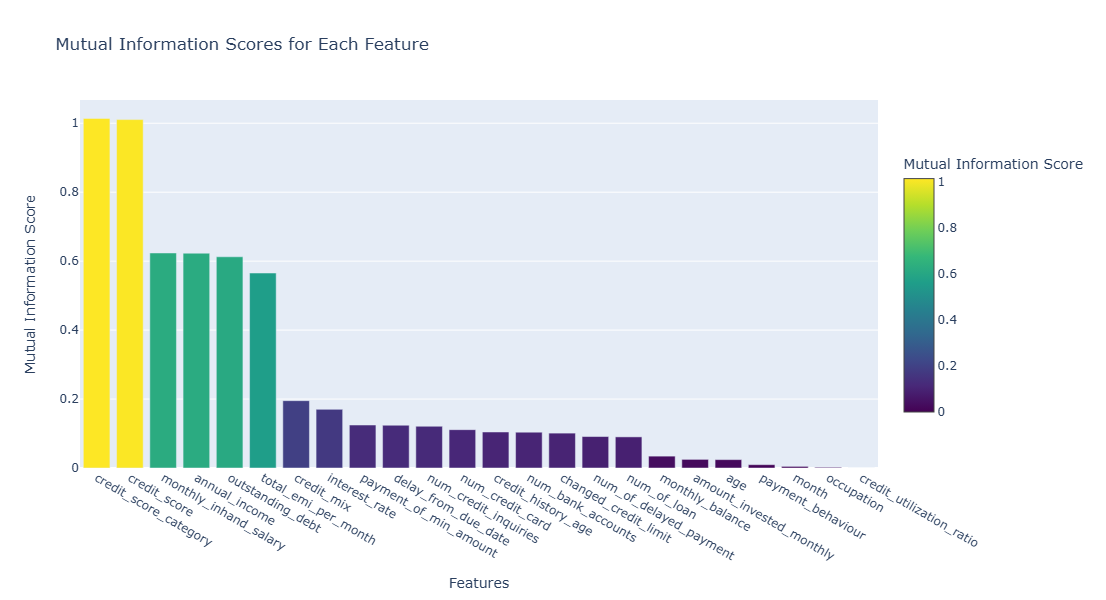

<Figure size 640x480 with 0 Axes>

In [71]:
# Plot Mutual Info Score(MIS) with Viridis colorscale and larger size
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, 
                             marker=dict(color=sorted_scores, colorscale='Viridis', 
                                         colorbar=dict(title='Mutual Information Score', len=0.75)))])

fig.update_layout(
    title='Mutual Information Scores for Each Feature',
    xaxis_title='Features',
    yaxis_title='Mutual Information Score',
    width=1000,  # Increase width for readability
    height=600   # Increase height for a larger display
)
plt.savefig('./Graphs/MutualinfoScoreOfFeatures.png', dpi=300, bbox_inches='tight')
fig.show()

## Based on this Mutual Information Score chart, we can focus on the below features when training our models and predicting outcomes:
1. credit_score_category
2. credit_score
3. annual_income
4. total_debt_per_month
5. outstanding_debt

## Final Conclusions

Outstanding Bebt and Interest Rate:
These are the top facotrs to be used by institutions to predict weather a person is worthy of credit or not.
these two are by far the most influencial to the model;
features like "outstanding debt" or "interest rate" have high importance scores. This means they’re highly influential in deciding someone’s creditworthiness according to the model. The higher the score, the more the model "relies" on that feature when making predictions.

Credit History Combined with Montly Balance are also Key features and factors institutions should also focused on when determining credit worthiness.

While Ocupation does not seem as important of a feature:
Across most occupations, the **"Standard"** credit score category seems to have the highest count, followed by the **"Good"** credit score category and then the **"Poor"** category.
- This pattern indicates that most people fall into the **Standard** credit score range, with fewer achieving a **Good** score, and an even smaller portion classified as **Poor**

- Occupation can indirectly impact creditworthiness as it might reflect income stability, but it’s generally a less direct factor compared to financial metrics..





## Future Considerations

- **Debt-to-Income Ratio**: Including this metric could provide insights into how income levels affect these spending and payment behaviors.
- **Credit Utilization Rate**: Analyzing how much of their available credit individuals use could help explain why certain behaviors result in lower scores.- we could have used Hypertunning to improve our model's performance and trim some of the data off to allow the model to run quicker
- s.